In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [10]:
# load the data set
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


- x data = the image itself (the pixel data)
- y data = the digit (the classification)

In [11]:
# normalize the data (scale it down)
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

We do not need to normalize the digits, we only want to normalize the pixels as this makes it easier for the neural network to do the calculations.

In [12]:
# the neural network
model = tf.keras.models.Sequential()
# add layers to model:
# flatten layer
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# dense layers
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
# output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

c:\Users\Rina Alo\Dropbox\PC\Desktop\coding_files\machine_learning\neural_network_digit_recognition\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- flatten layer:
    - flattens the 28x28 grid into a line of 724 pixels
- dense layer
    - the most basic layer.
    - each neuron is connected to each other neuron through the layer
    - activation func - relu: rectified linear unit
        - if negative, output is 0. Otherwise, goes linearly
    - output layer
        - 10 units (neurons) that represent the digits.
        - activation func - softmax: makes sure all the outputs (the 10 neurons) make up to 1. In the end, each neuron will have a value which signals of likely the image is this digit, so softmax gives us the probability for each digit to be the right answer.

In [13]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
# fit the model (train the model)
model.fit(x_train, y_train, epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9953 - loss: 0.0140
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9966 - loss: 0.0113
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9975 - loss: 0.0091
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9973 - loss: 0.0083
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9974 - loss: 0.0080
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9980 - loss: 0.0064
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9979 - loss: 0.0062
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9980 - loss: 0.0065


In [27]:
# save the model
model.save('handwritten.keras')

In [31]:
# load the model (after it has been trained)
model = tf.keras.models.load_model('handwritten.keras')

In [34]:
# evaluate how well the model performs on the testing data
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9739 - loss: 0.1138
0.09983617067337036
0.9754999876022339


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The digit is probably a 0


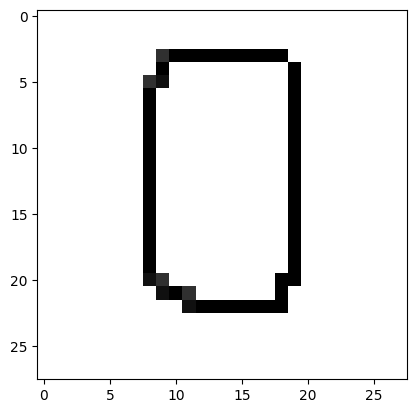

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The digit is probably a 5


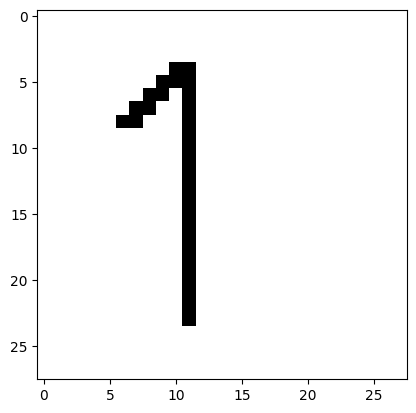

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The digit is probably a 2


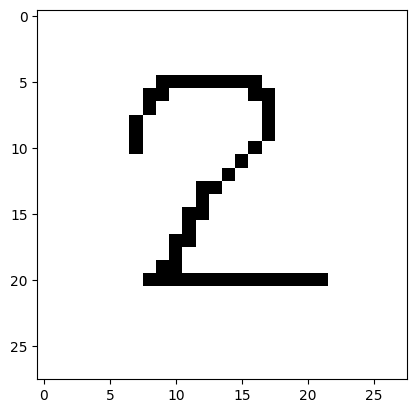

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The digit is probably a 3


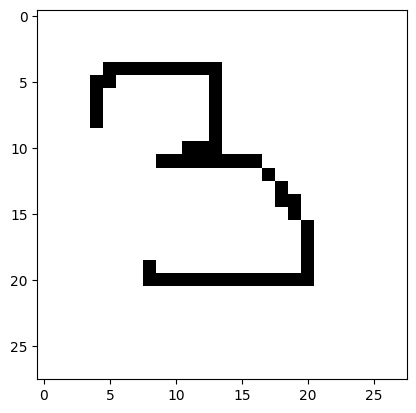

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The digit is probably a 4


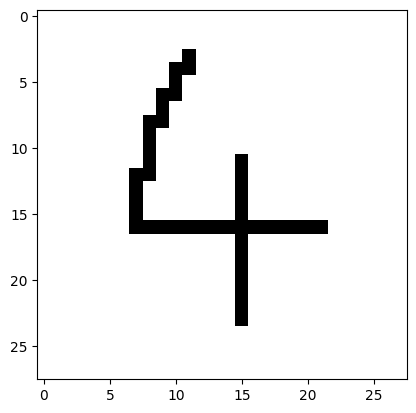

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The digit is probably a 5


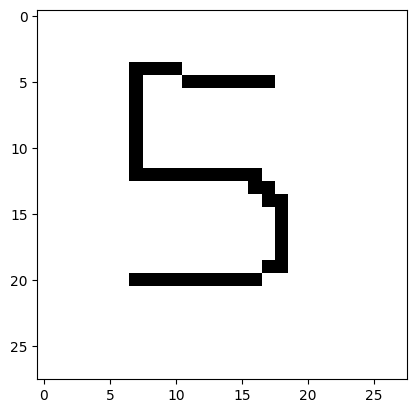

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The digit is probably a 5


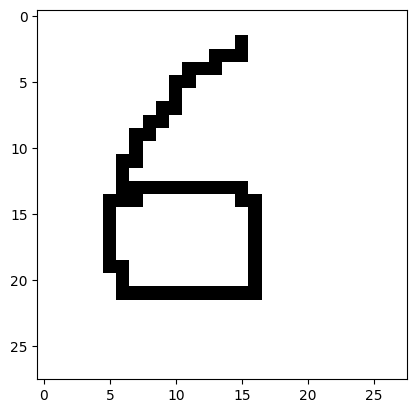

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The digit is probably a 3


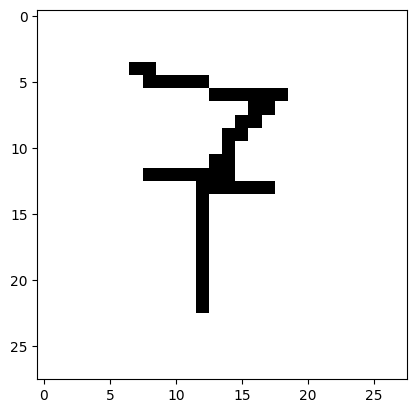

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The digit is probably a 3


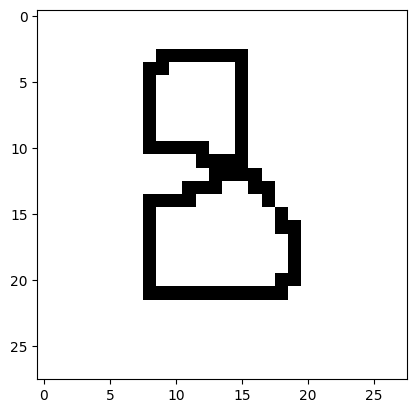

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The digit is probably a 9


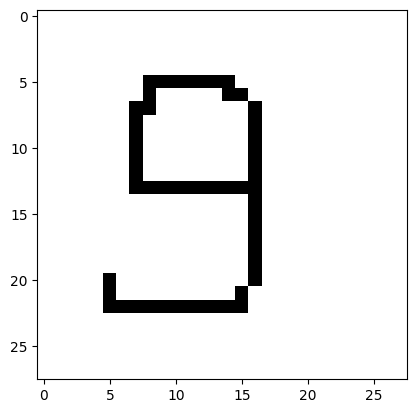

In [33]:
image_number = 0
while os.path.isfile(f"digits/{image_number}.png"):
    try:
        img = cv2.imread(f"digits/{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"The digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    finally:
        image_number += 1